In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
mra = pd.read_csv('movie.csv')
mra.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [3]:
mra.shape

(40000, 2)

In [4]:
# Assign column names
column_name = ['Review','Sentiment']
mra.columns = column_name

In [5]:
mra

,Review,Sentiment
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


In [6]:
mra.shape

(40000, 2)

In [7]:
mra['Sentiment'].value_counts()
# postive reviews 19981
# negative reviews 20019

Sentiment
0    20019
1    19981
Name: count, dtype: int64

In [8]:
# checking for null values
mra.isnull().sum()

Review       0
Sentiment    0
dtype: int64

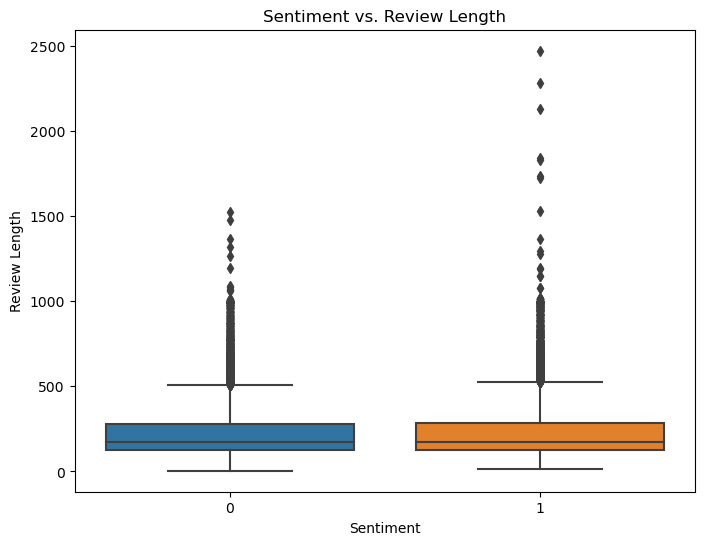

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment', y=mra['Review'].apply(lambda x: len(x.split())), data=mra)
plt.title('Sentiment vs. Review Length')
plt.xlabel('Sentiment')
plt.ylabel('Review Length')
plt.show()

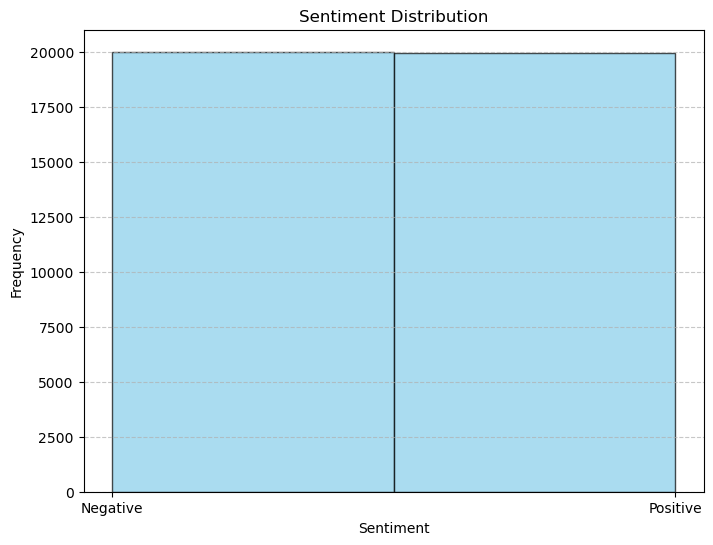

In [10]:
plt.figure(figsize=(8, 6))
plt.hist(mra['Sentiment'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

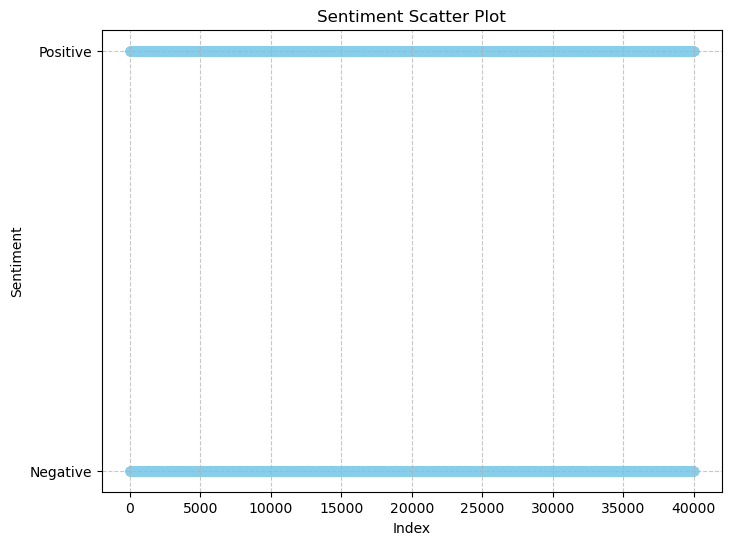

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(mra.index, mra['Sentiment'], color='skyblue', marker='o')
plt.title('Sentiment Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Sentiment')
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [12]:
x = mra['Review']
y = mra['Sentiment']

In [13]:
import string

In [14]:
#!pip install spacy

In [15]:
from spacy.lang.en.stop_words import STOP_WORDS

In [16]:
stopwords = list(STOP_WORDS) # list of stop words
stopwords

['themselves',
 'anyway',
 'much',
 'thence',
 '’m',
 'down',
 'ours',
 'of',
 'he',
 'out',
 'is',
 'can',
 'been',
 'his',
 '‘re',
 'after',
 'onto',
 'call',
 'whoever',
 'up',
 'mine',
 'across',
 'beside',
 'n’t',
 'back',
 'and',
 'please',
 'something',
 'twenty',
 'among',
 'four',
 'sixty',
 'toward',
 'or',
 'hereby',
 'own',
 'to',
 "'s",
 'here',
 'through',
 'towards',
 'get',
 'for',
 'hers',
 'whereas',
 "'d",
 'herein',
 'everyone',
 'wherever',
 'besides',
 'former',
 'those',
 'seems',
 'eleven',
 '‘m',
 'moreover',
 'now',
 'did',
 'part',
 'that',
 'within',
 'rather',
 'already',
 'ever',
 'thereupon',
 'might',
 'forty',
 'per',
 'one',
 'ourselves',
 'well',
 'without',
 'around',
 'go',
 'next',
 'really',
 'five',
 'beforehand',
 'whereby',
 'anyhow',
 'there',
 'had',
 'three',
 'also',
 'at',
 'so',
 '‘s',
 'as',
 "'re",
 'ten',
 'doing',
 'must',
 'regarding',
 'then',
 'itself',
 'every',
 'enough',
 'will',
 'always',
 'say',
 'used',
 'once',
 'not',
 'wh

In [17]:
# creating a function for data cleaning

In [18]:
#!python -m spacy download en_core_web_sm

In [19]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string

nlp = spacy.load('en_core_web_sm')

def text_data_cleaning(sentence):
    doc = nlp(sentence)
    stopwords = STOP_WORDS
    punct = string.punctuation
    cleaned_tokens = []
    
    for token in doc:
        if token.text.lower() not in stopwords and token.text not in punct:
            cleaned_tokens.append(token.text)
    
    return cleaned_tokens

In [20]:
# Test the function
cleaned_text = text_data_cleaning("Hello all, It's a beautiful day outside there!")
print(cleaned_text)

['Hello', 'beautiful', 'day', 'outside']


In [21]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [22]:
tfidf = TfidfVectorizer(tokenizer=text_data_cleaning)
tfidf

TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x000002009C1BFE20>)

In [23]:
classifier = LinearSVC()

In [24]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.3,random_state=42)

In [25]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(28000,)
(12000,)
(28000,)
(12000,)


In [26]:
xtrain.head()

38015    Awful, simply awful. It proves my theory about...
2281     When I first saw this film it was about 1956 a...
36629    This movie is just lame. A total waste of time...
6087     Unless the title is supposed to be some kind o...
11792    Red Skelton was still another major star who m...
Name: Review, dtype: object

In [27]:
clf = Pipeline([('tfidf',tfidf), ('clf',classifier)])
clf

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x000002009C1BFE20>)),
                ('clf', LinearSVC())])

In [28]:
clf.fit(xtrain,ytrain)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x000002009C1BFE20>)),
                ('clf', LinearSVC())])

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
ypred = clf.predict(xtest)

In [31]:
confusion_matrix(ytest,ypred)

array([[5255,  709],
       [ 654, 5382]], dtype=int64)

In [32]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5964
           1       0.88      0.89      0.89      6036

    accuracy                           0.89     12000
   macro avg       0.89      0.89      0.89     12000
weighted avg       0.89      0.89      0.89     12000



In [33]:
accuracy_score(ytest,ypred)

0.8864166666666666

In [34]:
# testing
clf.predict(["Wow, I am learning Natural language Processing in fun fashion!"])

array([1], dtype=int64)

In [35]:
clf.predict(["When I put this movie in my DVD player, and sa!"])

array([1], dtype=int64)